## Data overview, dependencies exploration and top universities comparison
### ARWU (Shanghai) data

In [1]:
import numpy as np
import pandas as pd

In [2]:
import requests
import sys
import json
import time

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode()

First of all let's open the data and see its structure

<a href="http://www.shanghairanking.com/ARWU-Methodology-2015.html">ARWU Methodology</a>
<table cellspacing="0" class="scaletable">
  			
          <tbody><tr>
            <th scope="col" class="greyblue">Criteria </th>
            <th scope="col" class="greyblue">Indicator</th>
            <th scope="col" class="greyblue">Code</th>
            <th scope="col" class="greyblue">Weight</th>
          </tr>
           <tr class="bgfd">
            <td class="left">Quality of Education</td>
            <td class="left">Alumni of an institution winning Nobel Prizes and Fields Medals</td>
            <td>Alumni</td>
            <td>10%</td>
          </tr>
          <tr class="bgf5">
            <td rowspan="2" class="left">Quality of Faculty</td>
            <td class="left">Staff of an institution winning Nobel Prizes and Fields Medals</td>
            <td>Award</td>
            <td>20%</td>
          </tr>
          <tr class="bgf5">
            <td class="left">Highly cited researchers in 21 broad subject categories</td>
            <td>HiCi</td>
            <td>20%</td>
          </tr>
          <tr class="bgfd">
            <td rowspan="2" class="left">Research Output</td>
            <td class="left">Papers published in Nature and Science*</td>
            <td>N&amp;S</td>
            <td>20%</td>
          </tr>
          <tr class="bgfd">
            <td class="left">Papers indexed in Science Citation Index-expanded and Social Science Citation Index</td>
            <td>PUB</td>
            <td>20%</td>
          </tr>
          <tr class="bgf5">
            <td class="left">Per Capita Performance</td>
            <td class="left">Per capita academic performance of an institution</td>
            <td>PCP</td>
            <td>10%</td>
          </tr>
          <tr class="bgfd">
            <td class="left">Total</td>
            <td></td>
            <td></td>
            <td>100%</td>
          </tr>
          <tr>
            <td colspan="5" class="left">* For institutions specialized in humanities and social sciences such as London School of Economics, N&amp;S is not considered, and the weight of N&amp;S is relocated to other indicators.</td>
          </tr>
       </tbody></table>

In [5]:
data = pd.read_csv('data/shanghaiData.csv', skiprows=[3897]) # empty line

Of course, watch my university =)

In [6]:
data.iloc[np.where([data['university_name'] == 'Moscow State University'])[1]]

world_rank          university_name national_rank  total_score  alumni  \
67           67  Moscow State University             1         28.4    51.4   
570          70  Moscow State University             1         27.9    49.5   
1075         76  Moscow State University             1         27.1    51.6   
1579         70  Moscow State University             1         28.1    49.1   
2089         77  Moscow State University             1         26.9    47.9   
2587         74  Moscow State University             1         27.9    46.8   
3090         77  Moscow State University             1         26.9    47.4   
3593         80  Moscow State University             1         26.3    43.7   
3877         79  Moscow State University           1.0         26.1    43.1   
3979         84  Moscow State University             1         26.1    42.4   
4481         86  Moscow State University             1         25.3    41.4   

      award  hici    ns   pub   pcp  year  
67     34.9   0.0   7.5  54.0  31.6  2005  
570    34.2   0.0   5.6  54.3  33.4  2006  
1075   34.2   0.0   7.5  48.5  31.6  2007  
1579   34.2   0.0   8.3  53.2  33.4  2008  
2089   34.2   0.0   8.2  48.7  31.7  2009  
2587   34.1   0.0   9.6  52.4  31.2  2010  
3090   34.1   0.0  10.1  46.9  31.2  2011  
3593   34.1   0.0   9.1  48.1  29.0  2012  
3877   33.3   0.0   8.8  48.1  30.5  2013  
3979   33.0   0.0   9.7  47.9  30.7  2014  
4481   33.0   0.0   7.7  46.4  31.3  2015

There are no total scores for universities that are below top200, so let us count it using ARWU methodology (watch above)

In [7]:
data['total_score_re'] = data.apply(lambda x: 0.1 * x[4] + 0.2 * x[5] + 0.2 * x[6] + 0.2 * x[7] + 0.2 * x[8] + 0.1 * x[9], axis=1)

Correlation between new and old scores are almost 1, so we can drop old scores and add new scores

In [8]:
data[['total_score', 'total_score_re']].corr()

total_score  total_score_re
total_score        1.000000        0.999979
total_score_re     0.999979        1.000000

In [9]:
data.drop('total_score', 1, inplace=True)
data.rename(columns={'total_score_re': 'total_score'}, inplace=True)

In [10]:
data[:10]

world_rank                              university_name national_rank  \
0          1                           Harvard University             1   
1          2                      University of Cambridge             1   
2          3                          Stanford University             2   
3          4           University of California, Berkeley             3   
4          5  Massachusetts Institute of Technology (MIT)             4   
5          6           California Institute of Technology             5   
6          7                          Columbia University             6   
7          8                         Princeton University             7   
8          9                        University of Chicago             8   
9         10                         University of Oxford             2   

   alumni  award   hici     ns    pub    pcp  year  total_score  
0   100.0  100.0  100.0  100.0  100.0   72.4  2005        97.24  
1    99.8   93.4   53.3   56.6   70.9   66.9  2005        71.51  
2    41.1   72.2   88.5   70.9   72.3   65.0  2005        71.39  
3    71.8   76.0   69.4   73.9   72.2   52.7  2005        70.75  
4    74.0   80.6   66.7   65.8   64.3   53.0  2005        68.18  
5    59.2   68.6   59.8   65.8   52.5  100.0  2005        65.26  
6    79.4   60.6   56.1   54.2   69.5   45.4  2005        60.56  
7    63.4   76.8   60.9   48.7   48.5   59.1  2005        59.23  
8    75.6   81.9   50.3   44.7   56.4   42.2  2005        58.44  
9    64.3   59.1   48.4   55.6   68.4   53.2  2005        58.05

## Data visualization

Now I want to visualize data on the map, so I need coordinates of universities. I've done it by GeoNames web service

In [4]:
GEO_USER_NAME = "ospanoff"

def get_geo_by_university_name(uname, entries=2, retries=3):
    """
    This function gets geographic coordinates, country name
    and country code from GeoNames.
    """
    keys = {'q': uname, 'maxRows': entries, 'username': GEO_USER_NAME}
    
    for i in range(retries):
        r = requests.get('http://api.geonames.org/searchJSON', params=keys).json()['geonames']
        for a in r:
            if 'countryName' in a:
                return {
                    'countryName': a['countryName'],
                    'countryCode': a['countryCode'],
                    'lat': a['lat'],
                    'lng': a['lng'],
                    'university': uname
                }

        r = requests.get('http://api.geonames.org/wikipediaSearchJSON?', params=keys).json()['geonames']
        for a in r:
            keys_ll = {'lat': a['lat'], 'lng': a['lng'], 'username': GEO_USER_NAME}
            r0 = requests.get('http://api.geonames.org/countrySubdivisionJSON', params=keys_ll).json()
            if 'countryName' in r0:
                return {
                    'countryName': r0['countryName'],
                    'countryCode': r0['countryCode'],
                    'lat': a['lat'],
                    'lng': a['lng'],
                    'university': uname
                }
        
        time.sleep(0.1)
    
    return {
        'countryName': '',
        'countryCode': '',
        'lat': 0,
        'lng': 0,
        'university': uname
    }

In [11]:
universities = np.sort(list(set(data['university_name'])))

In [12]:
# %%time
# geos = dict()
# for i, un in enumerate(universities):
#     sys.stdout.write('\r{:.2f}%'.format((i + 1) / universities.size * 100))
#     geos[un] = get_geo_by_university_name(un)

# json.dump(geos, open('data/university_locs.json', 'w'))

In [13]:
geos = json.load(open('data/university_locs.json'))

Also I need country codes so I can draw data on the map

In [14]:
ccodes = pd.read_csv('data/country_codes.csv')

In [15]:
def get_country(un):
    country = geos[un[1]]['countryName']
    if country == 'South Korea':
        country = 'Korea, South'

    return country

data['country'] = data.apply(get_country, axis=1)

In [16]:
def get_country_avg_score(year):
    cnt_avg = dict(data.groupby('year').get_group(year).groupby('country')['total_score'].mean())
    country_avg = []
    for c in ccodes['COUNTRY']:
        if c in cnt_avg:
            country_avg += [cnt_avg[c]]
        else:
            country_avg += [0]
        
    return country_avg

In [17]:
def get_country_univ_num(year):
    cnt_count = dict(data.groupby('year').get_group(year).groupby('country')['total_score'].count())
    num = []
    for c in ccodes['COUNTRY']:
        if c in cnt_count:
            num += [cnt_count[c]]
        else:
            num += [0]
        
    return num

In [26]:
def get_country_max_score(year):
    cnt_count = dict(data.groupby('year').get_group(year).groupby('country')['total_score'].max())
    num = []
    for c in ccodes['COUNTRY']:
        if c in cnt_count:
            num += [cnt_count[c]]
        else:
            num += [0]
        
    return num

In [31]:
def get_country_min_score(year):
    cnt_count = dict(data.groupby('year').get_group(year).groupby('country')['total_score'].min())
    num = []
    for c in ccodes['COUNTRY']:
        if c in cnt_count:
            num += [cnt_count[c]]
        else:
            num += [0]
        
    return num

In [18]:
def plot_map(data, title, cb_title, cscale):
    map_data = [dict(
        type = 'choropleth',
        colorscale = cscale,
        locations = ccodes['CODE'],
        z = data,

        text = ccodes['COUNTRY'],
        marker = dict(
            line = dict(
                color = 'rgb(150,150,150)',
                width = 0.5
            )
        ),
        colorbar = dict(
            title = cb_title,
        ),
    )]

    layout = dict(
        title = title,
        geo = dict(
            showframe = False,
            showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),
        width=950,
        height=700
    )

    fig = dict(data=map_data, layout=layout)
    iplot(fig, validate=False)

In [33]:
year = 2015
title = '%s World University Rankings (avg. score)<br>Source:\
         <a href="http://www.shanghairanking.com/">\
         ARWU World University Rankings</a>' % year
cb_title = 'Avg. score'
cscale = None
plot_map(get_country_avg_score(year), title, cb_title, cscale)

We can see average scores of universities by countries on the map above. In this case Russia is higher than world's average score which is ~15. But if we look at the next map, we will see, that by max score Russia is lower than avg which is ~50

In [41]:
year = 2015
title = '%s World University Rankings (max. score)<br>Source:\
         <a href="http://www.shanghairanking.com/">\
         ARWU World University Rankings</a>' % year
cb_title = 'Max score'
cscale = None #[[0, 'rgb(255,255,255)'], [1, 'rgb(0,255,0)']]
plot_map(get_country_max_score(year), title, cb_title, cscale)

But by minimum score Russia is higher than USA =). But it's not fully correct info, cause there are a lot of unranked universities in Russia. But if we dismiss it, we can be proud of Russian science. (Yes, science, not education, because these data are scored mostly on science prize winnings (like Nobel Prize) and publications.

In [37]:
year = 2015
title = '%s World University Rankings (min. score)<br>Source:\
         <a href="http://www.shanghairanking.com/">\
         ARWU World University Rankings</a>' % year
cb_title = 'Min score'
cscale = None #[[0, 'rgb(255,255,255)'], [1, 'rgb(0,255,0)']]
plot_map(get_country_min_score(year), title, cb_title, cscale)

And let's see how many universities from each country in this rank. So we see Russia has only 3 universities, when USA has 156

In [39]:
year = 2015
title = '%s World University Rankings (number of univ-s)<br>Source:\
         <a href="http://www.shanghairanking.com/">\
         ARWU World University Rankings</a>' % year
cb_title = 'Number of universities<br>which are in the ranking'
cscale = None #[[0, 'rgb(255,255,255)'], [1, 'rgb(0,255,0)']]
plot_map(get_country_univ_num(year), title, cb_title, cscale)

## Data exploration

Now I'll explore some feature dependencies in these data.

In [59]:
year = 2015
data_byy = data.groupby('year').get_group(year)
corr = data_byy[['alumni', 'award', 'hici', 'ns', 'pub', 'pcp']].corr()

If he have a look to the correlation matrix, we will see a lot correlation that are above 0.5. But let's explore some interesting features

In [61]:
iplot([
    go.Heatmap(
        z=corr.values[::-1],
        x=['alumni', 'award', 'hici', 'ns', 'pub', 'pcp'],
        y=['alumni', 'award', 'hici', 'ns', 'pub', 'pcp'][::-1]
    )
])

In [86]:
def plot_corr(x_name, y_name, year):
    data_sc = [go.Scatter(
        x = data_byy[x_name],
        y = data_byy[y_name],
        text = data_byy['university_name'],
        mode = 'markers',
        marker = dict(
            size = 10,
            color = data_byy['total_score'],
            colorscale = 'Rainbow',
            showscale = True,
            colorbar = dict(
                title = 'total score',
            ),
        ),
    )]

    layout = go.Layout(
        title = '%s World University Rankings' % year,
        hovermode = 'closest',
        xaxis = dict(
            title = x_name,
        ),
        yaxis = dict(
            title = y_name,
        ),
        showlegend = False
    )

    iplot(go.Figure(data=data_sc, layout=layout))

#### Highly cited researchers in 21 broad subject categories	(HiCi) and Research Output	Papers published in Nature and Science (N&S)

There is high correlation (~0.866, the highest in the data) between these two features. It can be explained in the next way: hici is for hihgly citied researchers, ns is for publications. So if you publish a lot then you will be cited a lot. That is it.

In [94]:
plot_corr('hici', 'ns', year)

#### Alumni of an institution winning Nobel Prizes and Fields Medals (Alumni) and Quality of Faculty Staff of an institution winning Nobel Prizes and Fields Medals (Award)

There is high correlation too (~0.762, the second in the data) between these two features. If we don't consider data on x-axis (no staff won prizes but has alumnis with prizes) and y-axis (no alumnis won prizes but has staff with prizes), it is obvious that features strongly correlated. I think there are alumnis who are staff now and vice versa.

In [89]:
plot_corr('alumni', 'award', year)

#### Highly cited researchers in 21 broad subject categories (HiCi) and Papers indexed in Science Citation Index-expanded and Social Science Citation Index (PUB)

Here is not high correlation (~0.621), but we can sight that the more researchers have cited publications, the more they are cited. 

In [96]:
plot_corr('pub', 'hici', year)

#### Quality of Faculty Staff of an institution winning Nobel Prizes and Fields Medals (Award) and Papers indexed in Science Citation Index-expanded and Social Science Citation Index (PUB)

This case is the most uncorrelated. How can explain that? Nohow! I can only see researchers that are trying to publish but it doesn't help them to win awards.

In [95]:
plot_corr('award', 'pub', year)

## Top-7 university comparison + MSU

Now that we've been all waiting for. MSU vs Top7

Unfortunaetly, here are no interesting things =( Just data visualization

In [323]:
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib import colors as mcol

class Radar(object):

    def __init__(self, fig, titles, labels, rect=None):
        if rect is None:
            rect = [0.05, 0.05, 0.95, 0.95]

        self.n = len(titles)
        self.angles = np.arange(0, 360, 360.0/self.n)
        self.axes = [fig.add_axes(rect, projection="polar", label="axes%d" % i) 
                         for i in range(self.n)]

        self.ax = self.axes[0]
        self.ax.set_thetagrids(self.angles, labels=titles, fontsize=14)

        for ax in self.axes[1:]:
            ax.patch.set_visible(False)
            ax.grid("off")
            ax.xaxis.set_visible(False)

        for ax, angle, label in zip(self.axes, self.angles, labels):
            ax.set_rgrids(range(1, 102, 10), angle=angle, labels=label)
            ax.spines["polar"].set_visible(False)
            ax.set_ylim(0, 101)

    def plot(self, values, *args, **kw):
        angle = np.deg2rad(np.r_[self.angles, self.angles[0]])
        values = np.r_[values, values[0]]
        self.ax.plot(angle, values, *args, **kw)


In [414]:
top_univers = ['Harvard University',
               'Stanford University',
               'Massachusetts Institute of Technology (MIT)',
               'University of California, Berkeley', 'University of California-Berkeley',
               'University of Cambridge',
               'Princeton University',
               'California Institute of Technology',
               'Moscow State University']

In [415]:
top7msu = []

years = list(set(data['year']))
for i, year in enumerate(years):
    tmp = data.groupby('year').get_group(year)
    
    ind = np.where(tmp['university_name'] == top_univers[0])[0]
    univers = tmp.iloc[ind].values
    for un in top_univers[1:]:
        ind = np.where(tmp['university_name'] == un)[0]
        univers = np.append(univers, tmp.iloc[ind].values, axis=0) # don't use this, if you have a big data
    
    top7msu += [univers]
    
top7msu = np.array(top7msu)

Let's have a look at the radar charts below (2005 - 2015). Almost all universities haven't changed by year. But I can conclude that if we want MSU on the top10, we should increase our HiCi scores and N&S scores. So we have to publish more and be cited then =)

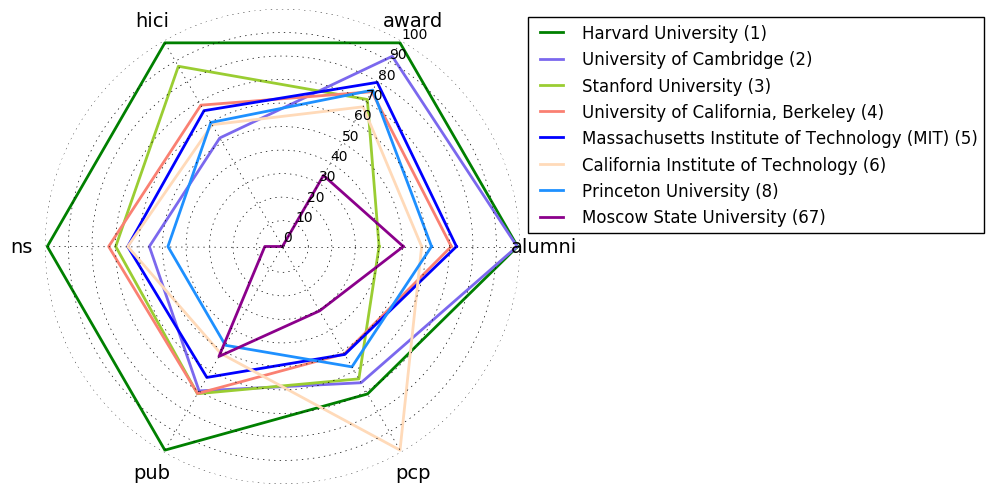

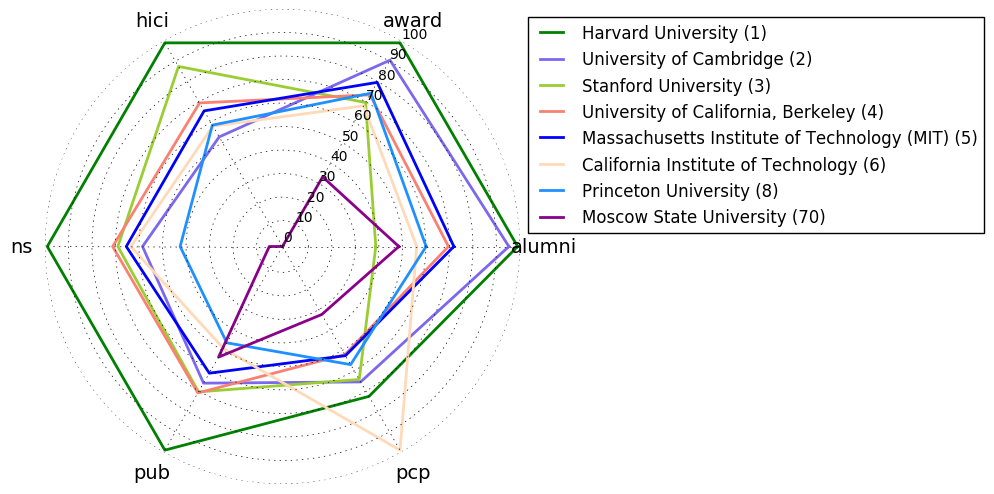

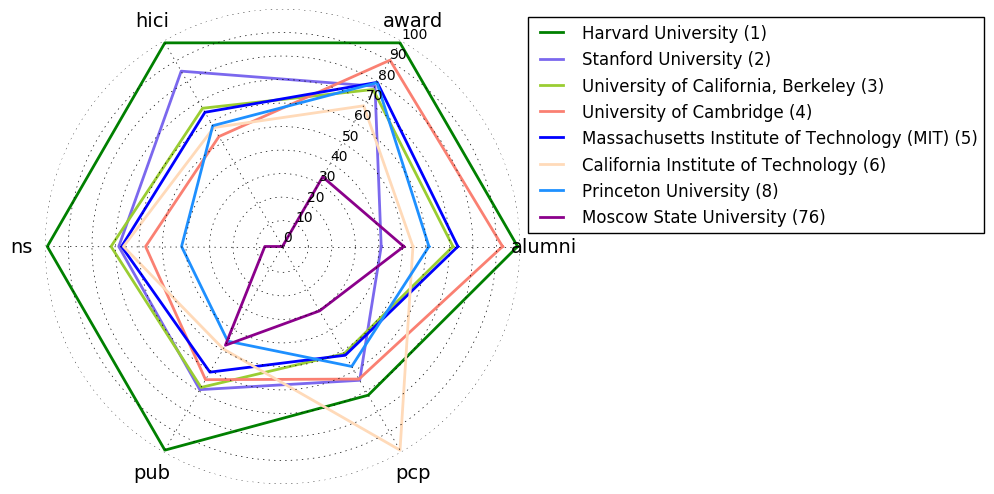

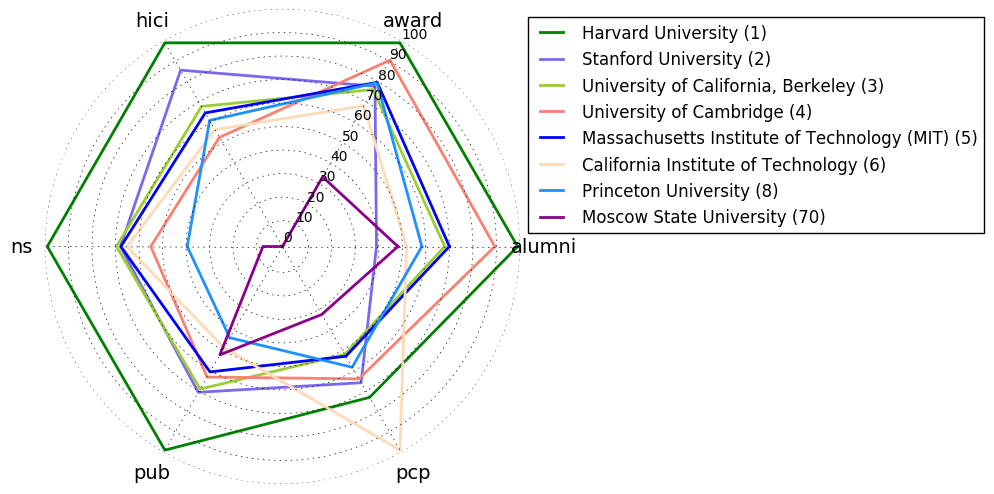

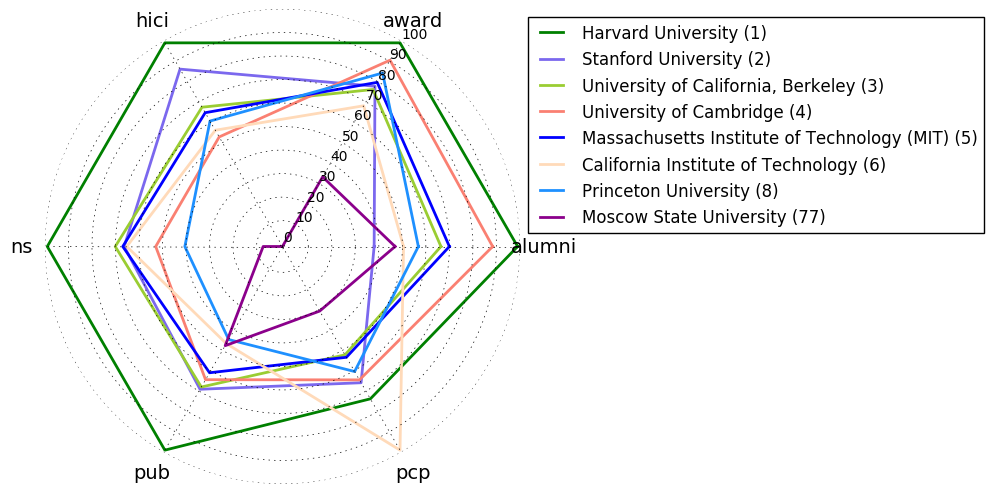

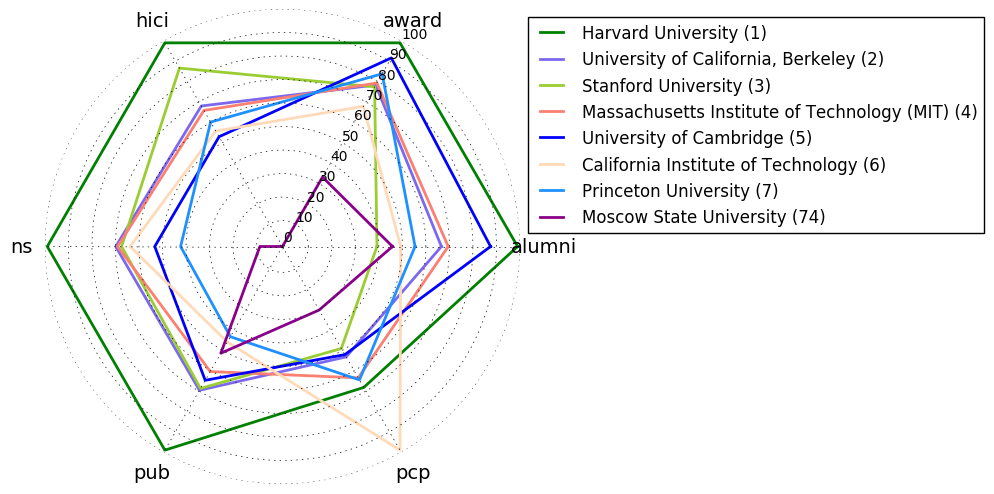

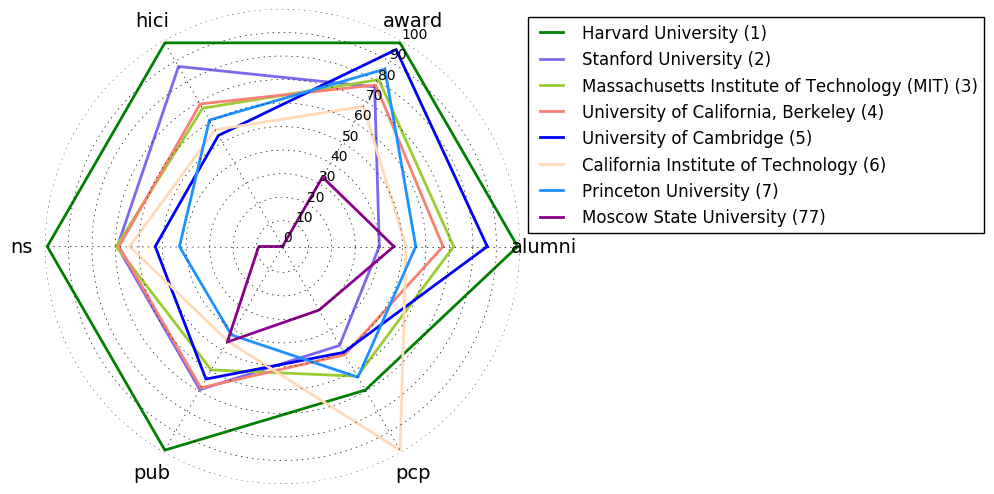

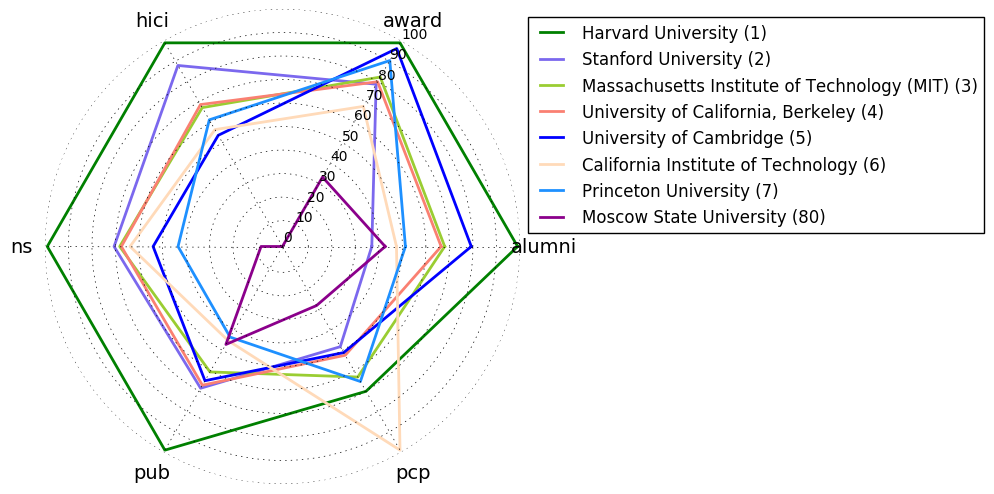

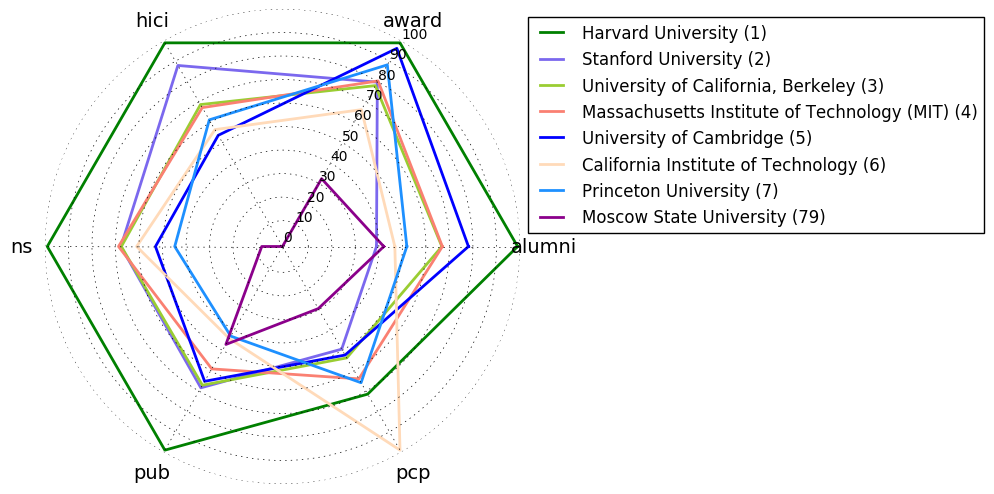

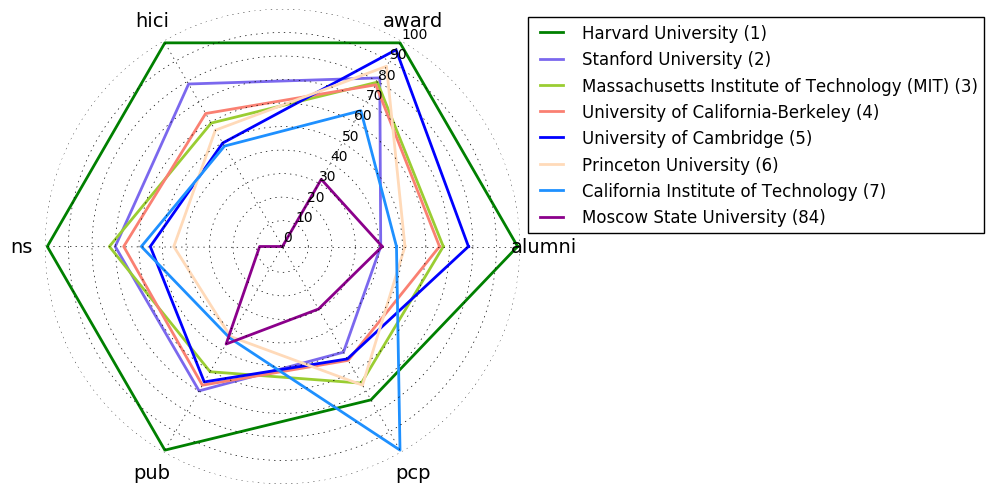

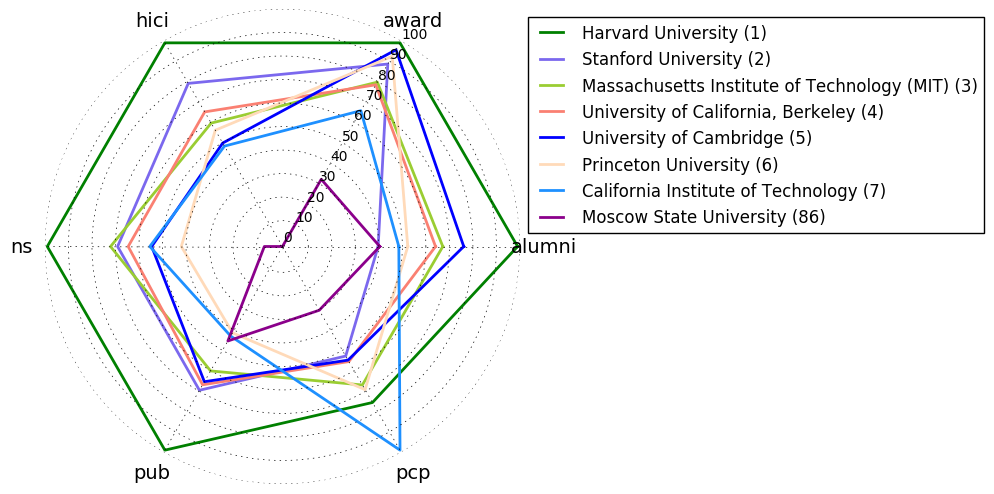

In [416]:
titles = ['alumni', 'award', 'hici', 'ns', 'pub', 'pcp']
labels = ['' if i != 1 else range(0, 101, 10) for i in range(len(title) - 1)]
colors = list(mcol.cnames)[:top7msu[0].shape[0]]

for d in top7msu:
    fig = plt.figure(figsize=(5, 5))
    radar = Radar(fig, titles, labels)
    for i, univ in enumerate(d[d[:, 0].astype(int).argsort()]):
        radar.plot(univ[3:9], lw=2, c=colors[i], alpha=1, label=univ[1] + ' (' + univ[0] + ')')

    radar.ax.legend(bbox_to_anchor=(1, 1), loc=2);
    plt.show()

Lastly, watch at this time series: ranks of the universities from 2005 to 2015. Unfortunately, MSU is losing its positions in the World University Rankings, that can not be said about top 7 universities. They only have little movements.

In [417]:
data_sc = []
for i in range(top7msu.shape[1]):
    data_sc += [go.Scatter(
        x = years,
        y = top7msu[:, i, 0].astype(int),
        name = top7msu[:, i, 1][0],
    )]

layout = go.Layout(
    title = 'World Top Universities Rankings 2005-2015',
    hovermode = 'closest',
    xaxis = dict(
        title = 'year',
    ),
    yaxis = dict(
        title = 'rank',
        autorange='reversed'
    ),
)

iplot(go.Figure(data=data_sc, layout=layout))

## Conclusion

These data are interesting to see, but useless. You can trace your university's rank, compare it with other universities, and that's all. Also these data don't describe the real rank of universities, just give a score from the point of view of science. But these data are designed for these purposes, so we shouldn't search meanings in them. And we shouldn't be upset cause the real knowledge doesn't depend on the rankings.

**Thank you your attention!**